In [120]:
%pylab inline
import pandas as pd
from pathlib import Path

Populating the interactive namespace from numpy and matplotlib


/home/wassname/.pyenv/versions/jup3.7.3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
ls data/raw/SEAM_Open_Data/SEAM_I_Well_Log_Delivery/Logs_In_Ascii_E

BedDipX.Well.1.E            PorosityTotal.Well.4.E
BedDipX.Well.2.E            PorosityTotal.Well.5.E
BedDipX.Well.3.E            ResistivityHorizontal.Well.1.E
BedDipX.Well.4.E            ResistivityHorizontal.Well.2.E
BedDipX.Well.5.E            ResistivityHorizontal.Well.3.E
BedDipY.Well.1.E            ResistivityHorizontal.Well.4.E
BedDipY.Well.2.E            ResistivityHorizontal.Well.5.E
BedDipY.Well.3.E            ResistivityNormal.Well.1.E
BedDipY.Well.4.E            ResistivityNormal.Well.2.E
BedDipY.Well.5.E            ResistivityNormal.Well.3.E
Delta.Well.1.E              ResistivityNormal.Well.4.E
Delta.Well.2.E              ResistivityNormal.Well.5.E
Delta.Well.3.E              ResistivityParallel.Well.1.E
Delta.Well.4.E              ResistivityParallel.Well.2.E
Delta.Well.5.E              ResistivityParallel.Well.3.E
Density.Well.1.E            ResistivityParallel.Well.4.E
Density.Well.2.E            ResistivityParallel.Well.5.E
Density.Well.3.E            ResistivityVert

In [111]:
well_log_dir = Path('data/raw/SEAM_Open_Data/SEAM_I_Well_Log_Delivery/Logs_In_Ascii_E')
files = list(well_log_dir.glob('*'))
data=[]
for f in files:
    df = pd.read_csv(f, sep=' +', header=None)
    name, well = f.name.split('.', 1)
    df.columns = ['depth', name]
    df['well'] = well
    df = df.set_index(['depth', 'well']).unstack()
    
    data.append(df)


/home/wassname/.pyenv/versions/jup3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [112]:
data

[      LayerGeoIndex
 well       Well.1.E
 depth              
 0              10.0
 10             10.0
 20             10.0
 30             10.0
 40             10.0
 ...             ...
 14960           1.0
 14970           1.0
 14980           1.0
 14990           1.0
 15000           1.0
 
 [1501 rows x 1 columns],       ResistivityVertical
 well             Well.5.E
 depth                    
 0                     0.3
 10                    0.3
 20                    0.3
 30                    0.3
 40                    0.3
 ...                   ...
 14960                20.0
 14970                20.0
 14980                20.0
 14990                20.0
 15000                20.0
 
 [1501 rows x 1 columns],       ResistivityParallel
 well             Well.5.E
 depth                    
 0                     0.3
 10                    0.3
 20                    0.3
 30                    0.3
 40                    0.3
 ...                   ...
 14960                20.0
 149

In [137]:
df2 = pd.concat(data, axis=1)
df2 = df2.T.sort_index().T
print(df2.columns.levels[0])
df2.info()
# pd.concat?

Index(['BedDipX', 'BedDipY', 'Delta', 'Density', 'Epsilon', 'Gamma',
       'GeoIndexRes', 'GeoSaltIndex', 'LayerGeoIndex', 'PorosityEffective',
       'PorosityTotal', 'ResistivityHorizontal', 'ResistivityNormal',
       'ResistivityParallel', 'ResistivityVertical', 'TTIDipX', 'TTIDipY',
       'Vp', 'VsElasticOriginal', 'VsElasticSim', 'Vshale'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 0 to 15000
Columns: 105 entries, ('BedDipX', 'Well.1.E') to ('Vshale', 'Well.5.E')
dtypes: float64(105)
memory usage: 1.3 MB


BedDipX                                      BedDipY                    \
well  Well.1.E Well.2.E Well.3.E Well.4.E Well.5.E Well.1.E Well.2.E Well.3.E   
depth                                                                           
0          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
20         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
30         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
40         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14960      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14970      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14980      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14990      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
15000      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

                         ... VsElasticSim                                      \
well  Well.4.E Well.5.E  ...     Well.1.E Well.2.E Well.3.E Well.4.E Well.5.E   
depth                    ...                                                    
0          0.0      0.0  ...          0.0      0.0      0.0      0.0      0.0   
10         0.0      0.0  ...          0.0      0.0      0.0      0.0      0.0   
20         0.0      0.0  ...          0.0      0.0      0.0      0.0      0.0   
30         0.0      0.0  ...          0.0      0.0      0.0      0.0      0.0   
40         0.0      0.0  ...          0.0      0.0      0.0      0.0      0.0   
...        ...      ...  ...          ...      ...      ...      ...      ...   
14960      0.0      0.0  ...       2960.0   2960.0   2960.0   2960.0   2960.0   
14970      0.0      0.0  ...       2960.0   2960.0   2960.0   2960.0   2960.0   
14980      0.0      0.0  ...       2960.0   2960.0   2960.0   2960.0   2960.0   
14990      0.0      0.0  ...       2960.0   2960.0   2960.0   2960.0   2960.0   
15000      0.0      0.0  ...       2960.0   2960.0   2960.0   2960.0   2960.0   

        Vshale                                      
well  Well.1.E Well.2.E Well.3.E Well.4.E Well.5.E  
depth                                               
0          0.0      0.0      0.0      0.0      0.0  
10         0.0      0.0      0.0      0.0      0.0  
20         0.0      0.0      0.0      0.0      0.0  
30         0.0      0.0      0.0      0.0      0.0  
40         0.0      0.0      0.0      0.0      0.0  
...        ...      ...      ...      ...      ...  
14960      0.0      0.0      0.0      0.0      0.0  
14970      0.0      0.0      0.0      0.0      0.0  
14980      0.0      0.0      0.0      0.0      0.0  
14990      0.0      0.0      0.0      0.0      0.0  
15000      0.0      0.0      0.0      0.0      0.0  

[1501 rows x 105 columns]

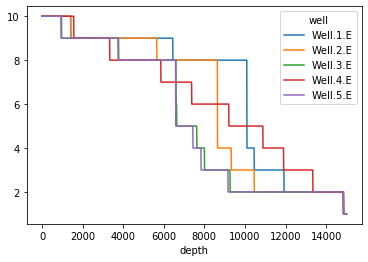

In [152]:
df2.T.unstack(1).T.head().T
df2['LayerGeoIndex'].plot()
df2

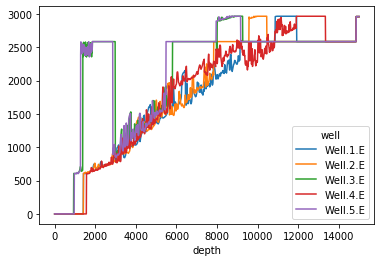

In [128]:
df2['VsElasticSim'].plot()

In [104]:
df2.xs('ResistivityVertical', 1).dropna().unstack()

well,Well.1.E,Well.2.E,Well.3.E,Well.4.E,Well.5.E
depth,,,,,
0,0.3,0.3,0.3,0.3,0.3
10,0.3,0.3,0.3,0.3,0.3
20,0.3,0.3,0.3,0.3,0.3
30,0.3,0.3,0.3,0.3,0.3
40,0.3,0.3,0.3,0.3,0.3
...,...,...,...,...,...
14960,20.0,20.0,20.0,20.0,20.0
14970,20.0,20.0,20.0,20.0,20.0
14980,20.0,20.0,20.0,20.0,20.0


In [100]:
df2.unstack()

ValueError: Index contains duplicate entries, cannot reshape

In [49]:
f.open().readlines()[:100]

['       0   0.10000E+02\n',
 '      10   0.10000E+02\n',
 '      20   0.10000E+02\n',
 '      30   0.10000E+02\n',
 '      40   0.10000E+02\n',
 '      50   0.10000E+02\n',
 '      60   0.10000E+02\n',
 '      70   0.10000E+02\n',
 '      80   0.10000E+02\n',
 '      90   0.10000E+02\n',
 '     100   0.10000E+02\n',
 '     110   0.10000E+02\n',
 '     120   0.10000E+02\n',
 '     130   0.10000E+02\n',
 '     140   0.10000E+02\n',
 '     150   0.10000E+02\n',
 '     160   0.10000E+02\n',
 '     170   0.10000E+02\n',
 '     180   0.10000E+02\n',
 '     190   0.10000E+02\n',
 '     200   0.10000E+02\n',
 '     210   0.10000E+02\n',
 '     220   0.10000E+02\n',
 '     230   0.10000E+02\n',
 '     240   0.10000E+02\n',
 '     250   0.10000E+02\n',
 '     260   0.10000E+02\n',
 '     270   0.10000E+02\n',
 '     280   0.10000E+02\n',
 '     290   0.10000E+02\n',
 '     300   0.10000E+02\n',
 '     310   0.10000E+02\n',
 '     320   0.10000E+02\n',
 '     330   0.10000E+02\n',
 '     340   0